In [1]:
#Import Libraries and packages

# For Data Exploration
import pandas as pd
import numpy as np

# For Data/Feature preparation & Analysis
from sklearn import preprocessing

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Sampled Data into DataFrame

df = pd.read_csv('StratifiedSample_150K.csv')
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,AA,AA,AA,326,AA,N200NV,326,11057,CLT,...,599,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-01-01,AA,AA,AA,330,AA,N906NN,330,11057,CLT,...,130,0.0,0.0,19.0,0.0,46.0,NaN,NaN,NaN,NaN


In [3]:
# Understanding dataframe

print(df.shape)
df.describe()

(150000, 42)


,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,149969.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,1251.000000,1251.000000,1251.000000,0.0
mean,2644.289607,2644.087767,12675.700000,12867.493127,1400.909093,1405.275273,15.889197,19.998647,1424.164053,1516.548847,...,876.018500,20.943447,4.112759,12.955353,0.069427,25.834656,1353.486811,33.099920,32.725819,NaN
std,1880.845708,1880.686596,1553.788951,1543.939309,492.348693,510.527168,50.233238,10.417555,516.392998,564.323501,...,639.978222,57.003113,30.325158,29.314462,1.760133,49.526449,505.098440,24.368972,23.913426,NaN
min,1.000000,1.000000,10397.000000,10135.000000,1.000000,1.000000,-342.000000,1.000000,1.000000,1.000000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000,NaN
25%,1069.000000,1069.000000,11292.000000,11298.000000,1000.000000,1002.000000,-4.000000,14.000000,1022.000000,1131.000000,...,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,941.500000,16.000000,16.000000,NaN
50%,2134.000000,2134.000000,12579.000000,12896.000000,1407.000000,1414.000000,-1.000000,18.000000,1427.000000,1554.000000,...,683.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1329.000000,28.000000,28.000000,NaN
75%,4210.000000,4210.000000,14107.000000,14122.000000,1820.000000,1829.000000,16.000000,24.000000,1845.000000,1958.000000,...,1184.000000,21.000000,0.000000,17.000000,0.000000,32.000000,1750.000000,41.500000,41.000000,NaN
max,9375.000000,9375.000000,14771.000000,16218.000000,2359.000000,2400.000000,1527.000000,174.000000,2400.000000,2400.000000,...,4502.000000,1512.000000,1116.000000,1160.000000,133.000000,1053.000000,2400.000000,172.000000,172.000000,NaN


### Data Cleaning and Preprocessing

In [4]:
# Checking for null values
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  31
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      150000
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
flights                     0
distance                    0
carrier_de

In [5]:
# Checking data columns

df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [6]:
# Eliminating Features on the basis of logic, data exploration & data description

col = ['fl_date','mkt_unique_carrier',
       'origin', 'origin_city_name', 'dest', 'dest_city_name','crs_dep_time',
       'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',  
       'diverted', 'cancelled', 'arr_delay',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance']

In [7]:
# Creating new dataframe from selected columns

df = df[col]
df.head()

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,cancelled,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",745,906,17,855,933,10,0,0,37,141,125,98,1,599
1,2018-01-01,AA,CLT,"Charlotte, NC",RDU,"Raleigh/Durham, NC",2240,2333,14,2340,8,30,0,0,65,53,72,28,1,130
2,2018-01-01,AA,CLT,"Charlotte, NC",MIA,"Miami, FL",1633,1855,22,1653,1848,8,0,0,1,142,145,115,1,650
3,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",1755,1915,13,1837,1912,8,0,0,5,140,116,95,1,599
4,2018-01-01,AA,CLT,"Charlotte, NC",DFW,"Dallas/Fort Worth, TX",1919,2113,14,1953,2113,8,0,0,8,174,162,140,1,936


In [8]:
# Splitting City and State names for origin and destination

df[['origin_city', 'origin_state']] = df.origin_city_name.str.split(',', expand = True)
df[['dest_city', 'dest_state']] = df.dest_city_name.str.split(',', expand = True)

In [9]:
# Split Date into date, month and year
df[['year', 'month', 'date']] = df.fl_date.str.split('-', expand = True)

# Replace Month numbers with month names for monthly data analysis 
df = df.replace({'month' : { '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', 
                                  '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', 
                                  '08': 'Aug', '09': 'Sep', '10': 'Oct' , '11': 'Nov', '12': 'Dec'}})

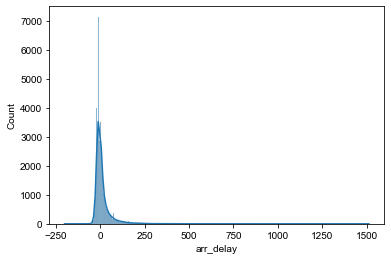

In [10]:
# Outlier Detection and removal

# Understanding the target variable
sns.histplot(x = df['arr_delay'], kde=True)
sns.set(rc={'figure.figsize':(10,4)})

In [11]:
df.arr_delay.describe()

count    150000.000000
mean         12.004387
std          52.065243
min        -200.000000
25%         -12.000000
50%           0.000000
75%          17.000000
max        1512.000000
Name: arr_delay, dtype: float64

In [12]:
# Outlier Removal
# Removing Values above arr_delay > 250 (900 rows: 0.6% of this data)

df = df.drop(df[(df['arr_delay']>250)].index)
df.head()

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,taxi_out,wheels_off,...,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date
0,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",745,906,17,855,...,98,1,599,Charlotte,NC,Chicago,IL,2018,Jan,01
1,2018-01-01,AA,CLT,"Charlotte, NC",RDU,"Raleigh/Durham, NC",2240,2333,14,2340,...,28,1,130,Charlotte,NC,Raleigh/Durham,NC,2018,Jan,01
2,2018-01-01,AA,CLT,"Charlotte, NC",MIA,"Miami, FL",1633,1855,22,1653,...,115,1,650,Charlotte,NC,Miami,FL,2018,Jan,01
3,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",1755,1915,13,1837,...,95,1,599,Charlotte,NC,Chicago,IL,2018,Jan,01
4,2018-01-01,AA,CLT,"Charlotte, NC",DFW,"Dallas/Fort Worth, TX",1919,2113,14,1953,...,140,1,936,Charlotte,NC,Dallas/Fort Worth,TX,2018,Jan,01


In [13]:
# Creating bins & categories for distance

bin_distance=[0,900,1800,2700]
catg_distance=['Short','Medium','Long']
df['distance_catg']=pd.cut(df.distance, bin_distance, labels=catg_distance)

# Checking created bins and their distribution in dataset
df.distance_catg.value_counts()

Short     94693
Medium    38798
Long      14705
Name: distance_catg, dtype: int64

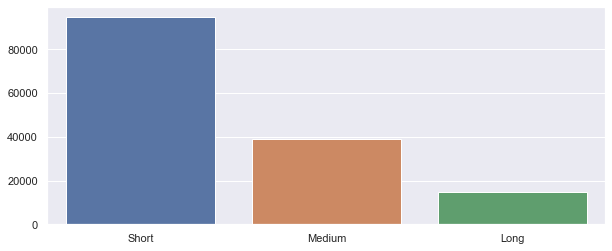

In [14]:
distanceBins = df.distance_catg.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=distanceBins.index, y=distanceBins.values)
plt.show()

In [15]:
# Converting military time(hours and minutes) into 24 hours
df['crs_arr_hrs'] = (df['crs_arr_time']/100).astype(int)
df['crs_dep_hrs'] = (df['crs_dep_time']/100).astype(int)

In [16]:
# Creating Bins for arrival and departure hours

bin_time=[0,6,12,18,23]
catg_time=['Early Morning','Morning','Afternoon','Evening']

# Arrival hours
arr_hrs_catg=df['crs_arr_hrs']
df['arr_hrs_catg']=pd.cut(arr_hrs_catg, bin_time, labels=catg_time)

# Checking Arrival class distribution
df['arr_hrs_catg'].value_counts()

Afternoon        55803
Evening          47127
Morning          38280
Early Morning     4403
Name: arr_hrs_catg, dtype: int64

In [17]:
# Departure hours binning
dep_hrs_catg=df['crs_dep_hrs']
df['dep_hrs_catg']=pd.cut(dep_hrs_catg, bin_time, labels=catg_time)

# Checking Dearture hours distribution

df['dep_hrs_catg'].value_counts()

Morning          57525
Afternoon        53285
Evening          31032
Early Morning     6513
Name: dep_hrs_catg, dtype: int64

In [18]:
# Working on categorical features
# Label Encoding

le = preprocessing.LabelEncoder()

In [21]:
# Label encoding categorical values

df['mkt_unique_carrier_new'] = le.fit_transform(df.mkt_unique_carrier)
df['origin_new'] = le.fit_transform(df.origin)
df['dest_new'] = le.fit_transform(df.dest)
df['origin_city_new'] = le.fit_transform(df.origin_city)
df['origin_state_new'] = le.fit_transform(df.origin_state)
df['dest_city_new'] = le.fit_transform(df.dest_city)
df['dest_state_new'] = le.fit_transform(df.dest_state)
df['month_new'] = le.fit_transform(df.month)
df['distance_catg_new'] = le.fit_transform(df['distance_catg'].astype(str))
df['arr_hrs_catg_new'] = le.fit_transform(df['arr_hrs_catg'].astype(str))
df['dep_hrs_catg_new'] = le.fit_transform(df['dep_hrs_catg'].astype(str))

In [22]:
# Checking columns again

df.columns

Index(['fl_date', 'mkt_unique_carrier', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'diverted', 'cancelled',
       'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'origin_city', 'origin_state', 'dest_city',
       'dest_state', 'year', 'month', 'date', 'distance_catg', 'crs_arr_hrs',
       'crs_dep_hrs', 'arr_hrs_catg', 'dep_hrs_catg', 'mkt_unique_carrier_new',
       'origin_new', 'dest_new', 'origin_city_new', 'origin_state_new',
       'dest_city_new', 'dest_state_new', 'month_new', 'distance_catg_new',
       'arr_hrs_catg_new', 'dep_hrs_catg_new'],
      dtype='object')

In [26]:
# Selecting Features for training dataframe

df_model = df[['taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in',
        'crs_elapsed_time', 'air_time',
       'flights','date', 'mkt_unique_carrier_new',
       'origin_new', 'dest_new', 'origin_city_new', 'origin_state_new',
       'dest_city_new', 'dest_state_new', 'month_new', 'distance_catg_new',
       'dep_hrs_catg_new', 'arr_hrs_catg_new', 'arr_delay']]

In [27]:
df_model.head()

,taxi_out,wheels_off,wheels_on,taxi_in,crs_elapsed_time,air_time,flights,date,mkt_unique_carrier_new,origin_new,dest_new,origin_city_new,origin_state_new,dest_city_new,dest_state_new,month_new,distance_catg_new,dep_hrs_catg_new,arr_hrs_catg_new,arr_delay
0,17,855,933,10,141,98,1,01,0,1,212,1,5,49,13,4,2,3,3,37
1,14,2340,8,30,53,28,1,01,0,1,239,1,5,218,26,4,2,2,2,65
2,22,1653,1848,8,142,115,1,01,0,1,189,1,5,168,8,4,2,0,0,1
3,13,1837,1912,8,140,95,1,01,0,1,212,1,5,49,13,4,2,0,2,5
4,14,1953,2113,8,174,140,1,01,0,1,77,1,5,61,43,4,1,2,2,8


In [31]:
# Saving Processed Dataframe into CSV File

df_model.to_csv('/Users/shilpitiwari/Desktop/Mid-Term/df_model.csv', index= False)

In [32]:
s = pd.read_csv('/Users/shilpitiwari/Desktop/Mid-Term/df_model.csv')
s

,taxi_out,wheels_off,wheels_on,taxi_in,crs_elapsed_time,air_time,flights,date,mkt_unique_carrier_new,origin_new,dest_new,origin_city_new,origin_state_new,dest_city_new,dest_state_new,month_new,distance_catg_new,dep_hrs_catg_new,arr_hrs_catg_new,arr_delay
0,17,855,933,10,141,98,1,1,0,1,212,1,5,49,13,4,2,3,3,37
1,14,2340,8,30,53,28,1,1,0,1,239,1,5,218,26,4,2,2,2,65
2,22,1653,1848,8,142,115,1,1,0,1,189,1,5,168,8,4,2,0,0,1
3,13,1837,1912,8,140,95,1,1,0,1,212,1,5,49,13,4,2,0,2,5
4,14,1953,2113,8,174,140,1,1,0,1,77,1,5,61,43,4,1,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149081,15,2318,7,2,76,49,1,30,8,4,132,5,6,105,43,9,2,2,2,68
149082,12,2124,2220,4,84,56,1,30,8,4,184,5,6,173,43,9,2,0,2,155
149083,11,2108,2352,10,146,104,1,30,8,4,68,5,6,51,34,9,2,2,2,36
149084,14,1938,2030,4,85,52,1,30,8,4,184,5,6,173,43,9,2,0,0,117
